# World Cup, formally FIFA World Analysics

In [1]:
#import data by kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d abecklas/fifa-world-cup

  0% 0.00/349k [00:00<?, ?B/s]
100% 349k/349k [00:00<00:00, 86.9MB/s]


In [3]:
#file unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/fifa-world-cup.zip') 
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#importing the Dependinces
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#Read csv file pandas 
data = pd.read_csv('/content/WorldCups.csv')

In [6]:
#check first five rows of the dataset
data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [7]:
#check last five rows of the dataset
data.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [8]:
#check shape of the dataset
data.shape

(20, 10)

In [9]:
#check more infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [10]:
#check mathamtic info
data.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [11]:
#check corr relastion of the dataset
data.corr()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


In [12]:
#check missing value of the dataset
data.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [13]:
#check all columns
data.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [14]:
data['Attendance'].dtypes #Some problem  with this column. As you can see dtype= object.

#There is a problem with this column , that's why the preprocessing
data['Attendance']= data["Attendance"].str.replace('.', '').astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [15]:
#Add the last worldcup row that wasn't in the csv, the last world cup
list2018= [2018,'Russia','France','Croatia','Belgium','England',169,32,64,"3031768"]
data.loc[len(data)] = list2018


In [16]:
#Add a column with data about the winner's continent

data['Winner_continent']= ['America','Europe','Europe','America','Europe','America','America','Europe','America','Europe',
                                   'America','Europe','America','Europe','America','Europe','America','Europe','Europe','Europe','Europe']


In [17]:

#'Rename some columns'

data= data.rename(columns={'Country':'Country_host','Runners-Up':'Second'})

In [18]:
#Add a column to inform if the host is in the best4
data['Host_best4'] = data[['Winner','Second','Third','Fourth']].eq(data['Country_host'],axis=0).any(1)

In [19]:
#Turn the Germany FR to Germany
data = data.replace(['Germany FR'],'Germany')

In [20]:
#Looking at how it looks like the DF
data.head()

,Year,Country_host,Winner,Second,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Winner_continent,Host_best4
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,America,True
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Europe,True
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Europe,False
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,America,True
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607,Europe,False


# Data Visualization

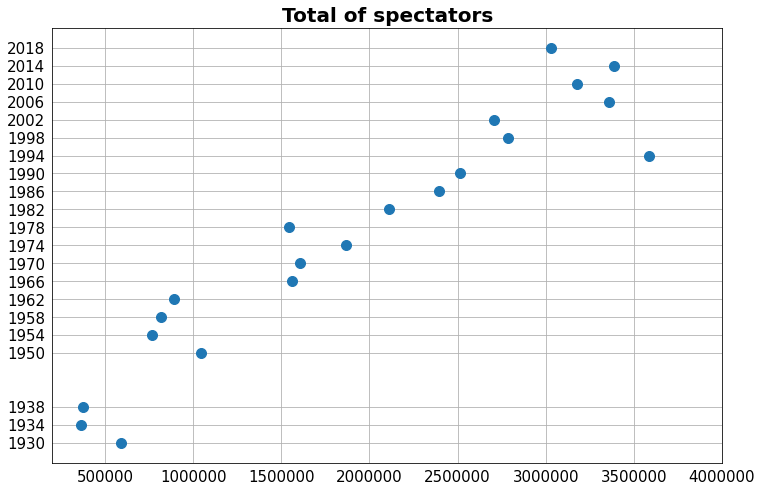

In [21]:
#There is a problem with this column , that's why the preprocessing
#hist_worldcup['Attendance']= hist_worldcup["Attendance"].str.replace('.', '').astype(int)
#hist_worldcup['Attendance']
fig, ax= plt.subplots(figsize=(12,8))
plt.title('Total of spectators',size=20,weight='bold')
data.plot.scatter(x='Attendance',y='Year',ax=ax,zorder=2,s=100)
#ax.spines[['right', 'top', 'left','bottom']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(data['Year'].tolist())
ax.set_xticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000])
ax.ticklabel_format(style='plain')

plt.tick_params(bottom=False, left=False)

# Number of countries in the World Cup through years

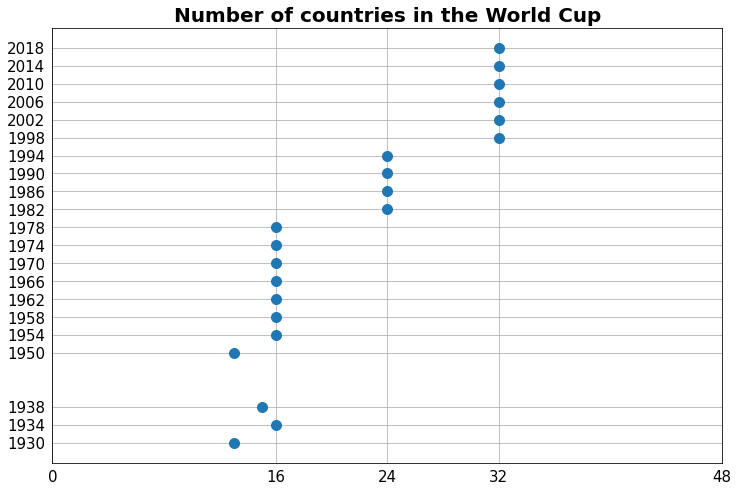

In [22]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('Number of countries in the World Cup',size=20,weight='bold')
data.plot.scatter(x='QualifiedTeams',y='Year',ax=ax,zorder=2,s=100)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(data['Year'].tolist())
ax.set_xticks([0,16,24 ,32,48])
plt.tick_params(bottom=False, left=False)

# World Cup goals scored per year

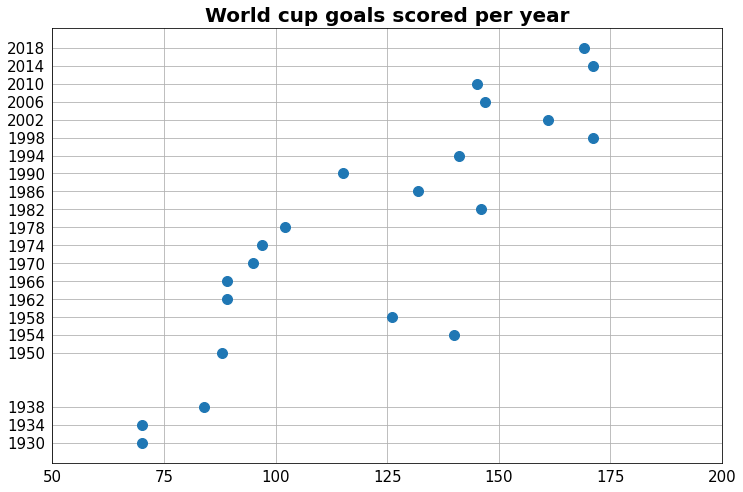

In [23]:
fig, ax= plt.subplots(figsize=(12,8))
plt.title('World cup goals scored per year',size=20,weight='bold')
data.plot.scatter(x='GoalsScored',y='Year',ax=ax,zorder=2,s=100)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(data['Year'].tolist())
ax.set_xticks([50,75,100,125,150,175,200])
plt.tick_params(bottom=False, left=False)

# World Cup Champions¶

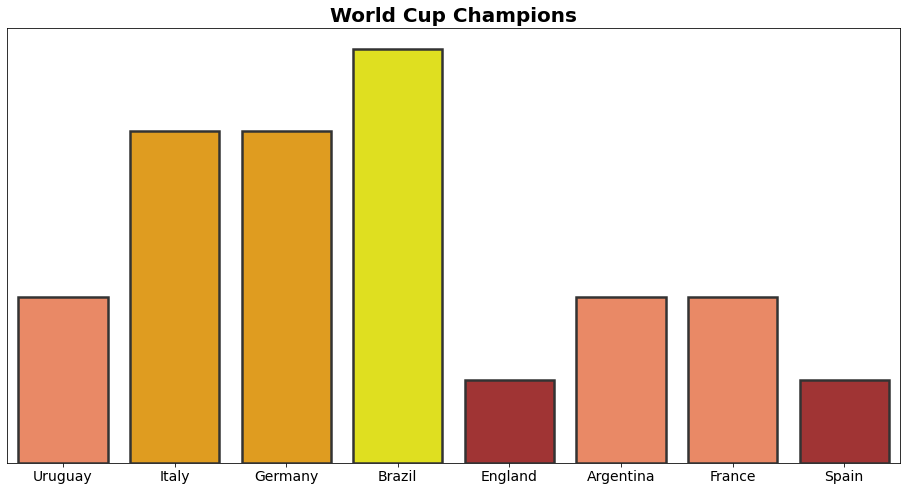

In [24]:
palette=['coral','orange','orange','yellow','firebrick','coral','coral','firebrick']
fig, ax= plt.subplots(figsize=(16,8))

plt.title('World Cup Champions',size=20,weight='bold')
sns.countplot(x = data['Winner'], palette=palette,linewidth=2.5, edgecolor=".2")
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)

# Which continent has got the most amount of World Cups?

In [25]:
index1 = data['Winner_continent'].value_counts().index.tolist() 
#preprocessing for plotting a pie chart
value1 = data['Winner_continent'].value_counts().values.tolist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


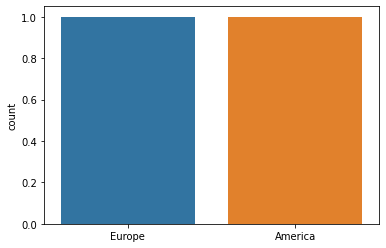

In [26]:
sns.countplot(data['Winner_continent'].value_counts().index.tolist() )

# But European Countries has a bit more.

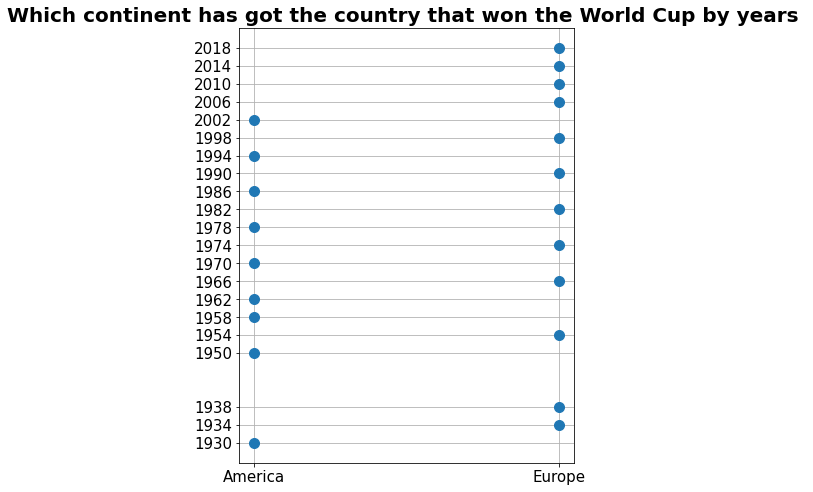

In [27]:
fig, ax= plt.subplots(figsize=(6,8))
plt.title('Which continent has got the country that won the World Cup by years ',size=20,weight='bold')
data.plot.scatter(x='Winner_continent',y='Year',ax=ax,zorder=2,s=100)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.grid(visible=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(data['Year'].tolist());

# The last Champion was France...

In [28]:
col=['Winner','Second','Third','Fourth'] #Preprocessing

countries = data[col].apply(pd.value_counts).reset_index().fillna(0)
countries['Total'] = countries['Winner']+countries['Second']+countries['Third']+countries['Fourth']
countries['Final'] = countries['Winner']+countries['Second']
countries

,index,Winner,Second,Third,Fourth,Total,Final
0,Argentina,2.0,3.0,0.0,0.0,5.0,5.0
1,Austria,0.0,0.0,1.0,1.0,2.0,0.0
2,Belgium,0.0,0.0,1.0,1.0,2.0,0.0
3,Brazil,5.0,2.0,2.0,2.0,11.0,7.0
4,Bulgaria,0.0,0.0,0.0,1.0,1.0,0.0
5,Chile,0.0,0.0,1.0,0.0,1.0,0.0
6,Croatia,0.0,1.0,1.0,0.0,2.0,1.0
7,Czechoslovakia,0.0,2.0,0.0,0.0,2.0,2.0
8,England,1.0,0.0,0.0,2.0,3.0,1.0
9,France,2.0,1.0,2.0,1.0,6.0,3.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

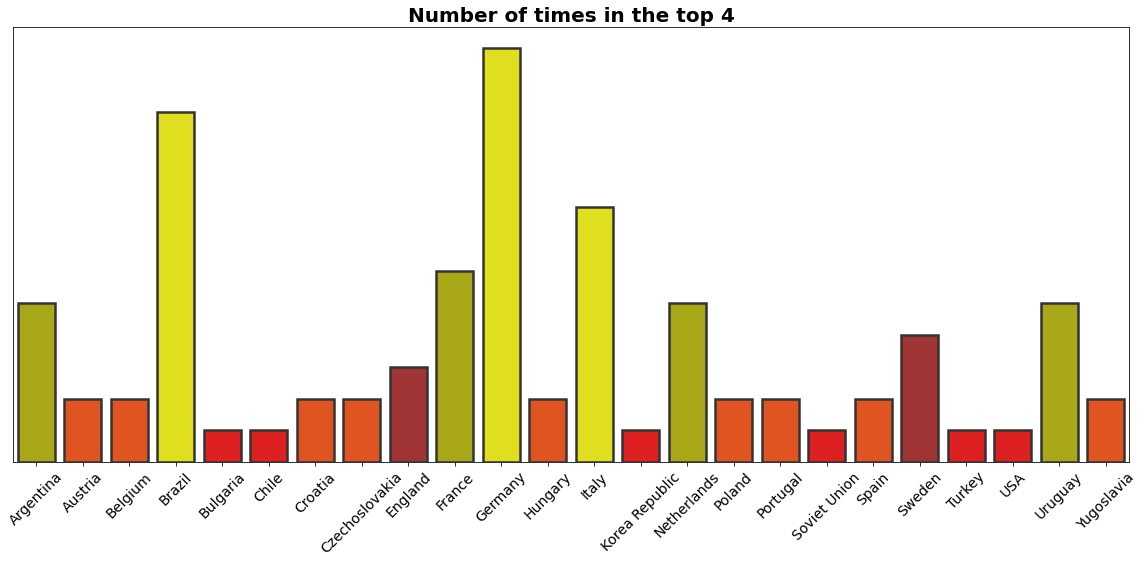

In [29]:
#Set the Palette
clrs= ['yellow' if (i>=8) else 'y' if (5<=i<8) else 'firebrick' if (3<=i<5) else 'orangered' if (i==2) else 'red' for i in countries['Total']]

fig, ax= plt.subplots(figsize=(20,8))
plt.title('Number of times in the top 4',size=20,weight='bold')
sns.barplot(data=countries,x='index',y='Total',palette=clrs,linewidth=2.5, edgecolor=".2")
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)

# Number of times in the final

In [30]:
finalist = countries.drop(countries[(countries['Winner']==0) & (countries['Second']==0)].index) #Preprocessing
finalist

,index,Winner,Second,Third,Fourth,Total,Final
0,Argentina,2.0,3.0,0.0,0.0,5.0,5.0
3,Brazil,5.0,2.0,2.0,2.0,11.0,7.0
6,Croatia,0.0,1.0,1.0,0.0,2.0,1.0
7,Czechoslovakia,0.0,2.0,0.0,0.0,2.0,2.0
8,England,1.0,0.0,0.0,2.0,3.0,1.0
9,France,2.0,1.0,2.0,1.0,6.0,3.0
10,Germany,4.0,4.0,4.0,1.0,13.0,8.0
11,Hungary,0.0,2.0,0.0,0.0,2.0,2.0
12,Italy,4.0,2.0,1.0,1.0,8.0,6.0
14,Netherlands,0.0,3.0,1.0,1.0,5.0,3.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

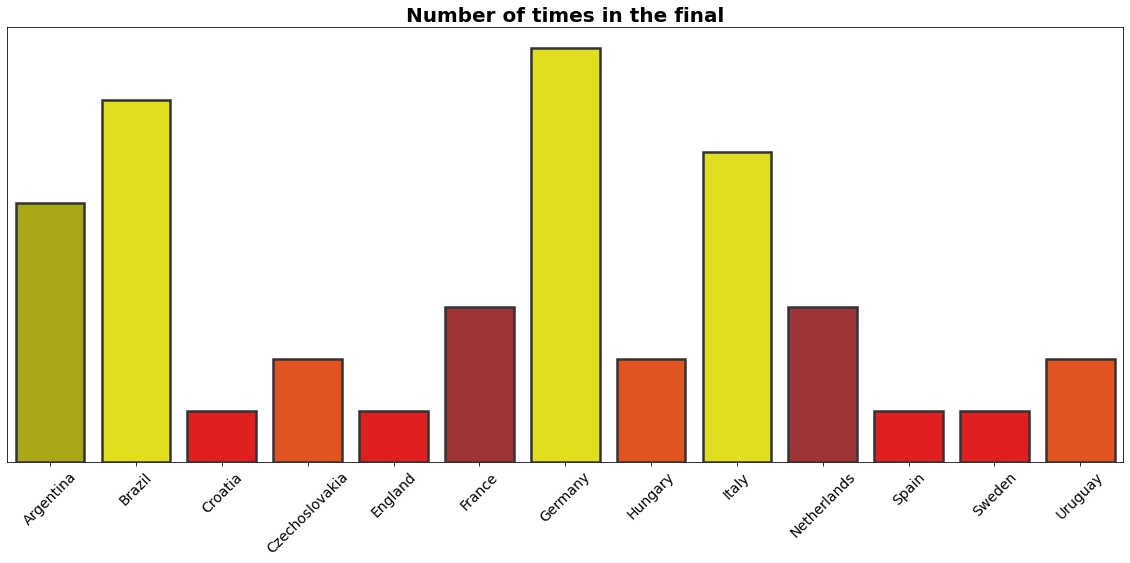

In [31]:
#Set the color
clrs= ['yellow' if (i>=6) else 'y' if (i==5) else 'firebrick' if (3<=i<5) else 'orangered' if (i==2) else 'red' for i in finalist['Final']]


fig, ax= plt.subplots(figsize=(20,8))
plt.title('Number of times in the final',size=20,weight='bold')
sns.barplot(data=finalist,x='index',y='Final',palette=clrs,linewidth=2.5, edgecolor=".2")
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)

# Looking at the relationship between being champion and reaching the final

In [32]:
finalist['rel_final'] = finalist['Winner']/finalist['Final'] #preprocessing
relationship= np.round(finalist[(finalist['Second']>0) | (finalist['Winner']>0)],decimals=2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

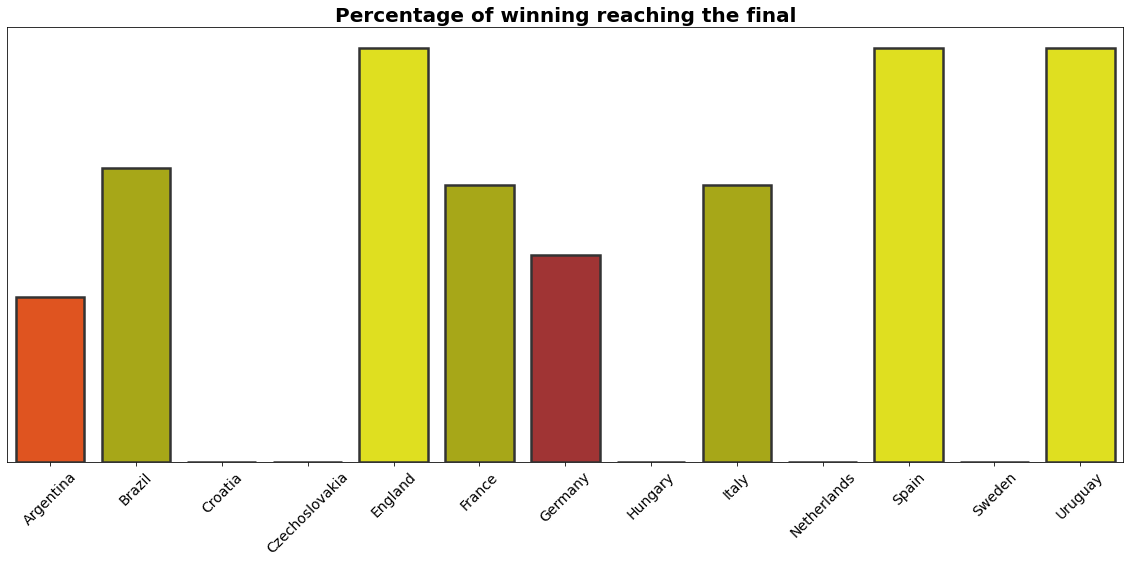

In [33]:
#Set the color
clrs= ['yellow' if (i==1) else 'y' if (0.5<i<1) else 'firebrick' if (i==0.5) else 'orangered' if (0<i<0.5) else 'red' for i in relationship['rel_final']]


fig, ax= plt.subplots(figsize=(20,8))
plt.title('Percentage of winning reaching the final',size=20,weight='bold')
sns.barplot(data=relationship,x='index',y='rel_final',palette=clrs,linewidth=2.5, edgecolor=".2")
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.tick_params(labelleft=False, left=False,labelsize=14)


plt.xticks(rotation=45)

# How many times each country reach at least the first 4 position

In [34]:
transpose=countries.T.rename(columns=countries.T.iloc[0]).drop(index=['index','Total']) #preprocessing transpose

transpose =transpose.reset_index()[0:4] 
transpose

,index,Argentina,Austria,Belgium,Brazil,Bulgaria,Chile,Croatia,Czechoslovakia,England,...,Netherlands,Poland,Portugal,Soviet Union,Spain,Sweden,Turkey,USA,Uruguay,Yugoslavia
0,Winner,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
1,Second,3.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Third,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
3,Fourth,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0


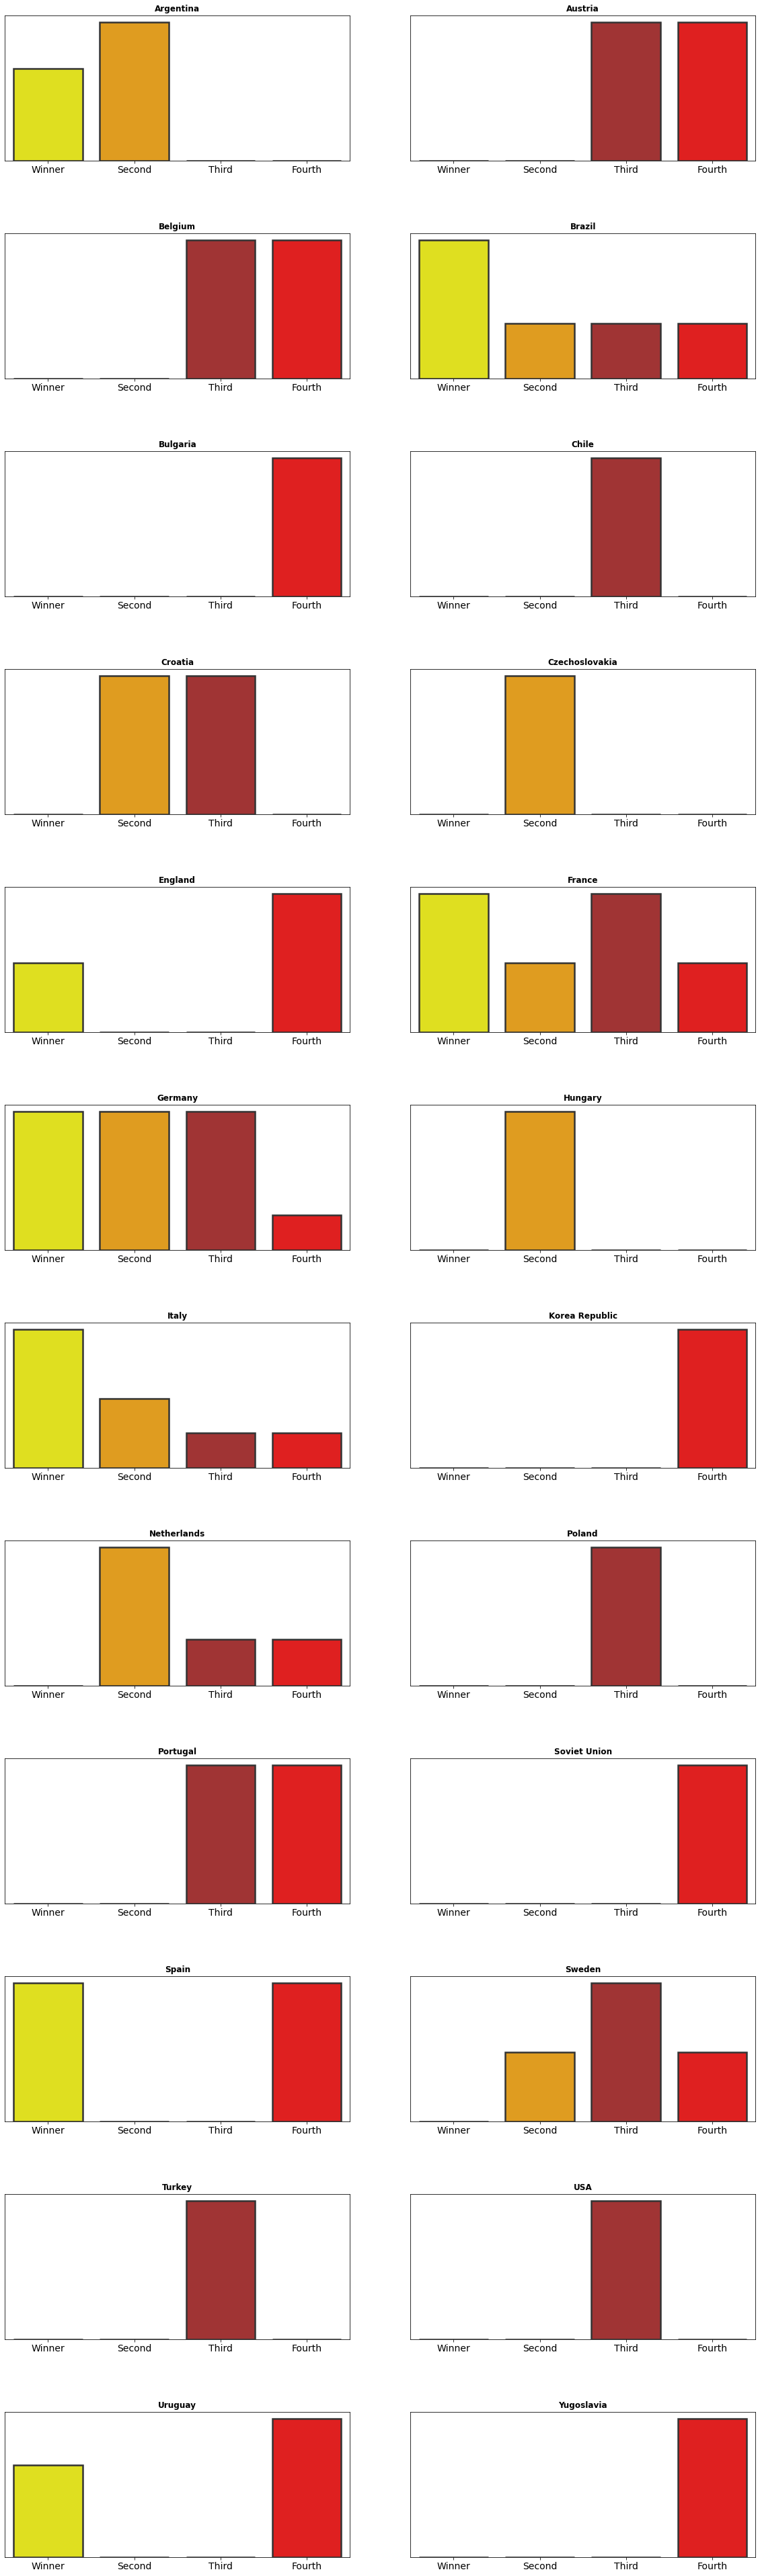

In [35]:
columns= transpose.columns[1:]
clr= ['yellow','orange','firebrick','red']
fig, axes = plt.subplots(12,2, figsize=(20,60))

fig.subplots_adjust(hspace=.5,top =1, wspace=.175)

for ax, col in zip(axes.flat,columns):
    sns.barplot(data=transpose, x='index',y=col,ax=ax,palette=clr,linewidth=2.5, edgecolor=".2")
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(labelleft=False, left=False,labelsize=14)
    ax.set_title(col,fontweight="bold")

## Extra Analysis

In [36]:
#load matches dataset in pandas dataframe
matches = pd.read_csv('/content/WorldCupMatches.csv')

In [37]:
#check first five rows of the dataset
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [38]:
#check last five rows of the dataset
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#check shape of the dataset
matches.shape

(4572, 20)

In [40]:
#checl all columns
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [41]:
#check more infomation of the dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [42]:
#chekc mathamtic 
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [43]:
#check corr realtion of the dataset
matches.corr()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
Year,1.000000,-0.381332,0.075339,0.314698,-0.288909,0.020934,0.343106,0.636591
Home Team Goals,-0.381332,1.000000,0.012474,-0.117751,0.729536,-0.009530,-0.110075,-0.196100
Away Team Goals,0.075339,0.012474,1.000000,-0.029801,-0.006304,0.693780,-0.005345,0.082687
Attendance,0.314698,-0.117751,-0.029801,1.000000,-0.126756,-0.037136,0.069394,0.164686
Half-time Home Goals,-0.288909,0.729536,-0.006304,-0.126756,1.000000,0.022204,-0.055303,-0.166201
Half-time Away Goals,0.020934,-0.009530,0.693780,-0.037136,0.022204,1.000000,0.011980,0.059456
RoundID,0.343106,-0.110075,-0.005345,0.069394,-0.055303,0.011980,1.000000,0.071549
MatchID,0.636591,-0.196100,0.082687,0.164686,-0.166201,0.059456,0.071549,1.000000


In [44]:
#check missing value of the data
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [45]:
#Drop Rows with all null values
matches = matches.dropna(how='all')

In [46]:
matches['Home Team Goals']= matches['Home Team Goals'].astype(int)
matches['Away Team Goals']= matches['Away Team Goals'].astype(int)

matches['result'] = matches['Home Team Goals'].astype(str)+"-"+matches['Away Team Goals'].astype(str)
matches['result']

0      4-1
1      3-0
2      2-1
3      3-1
4      1-0
      ... 
847    0-0
848    1-7
849    0-0
850    0-3
851    1-0
Name: result, Length: 852, dtype: object

## Matches with the highest number of Attendance

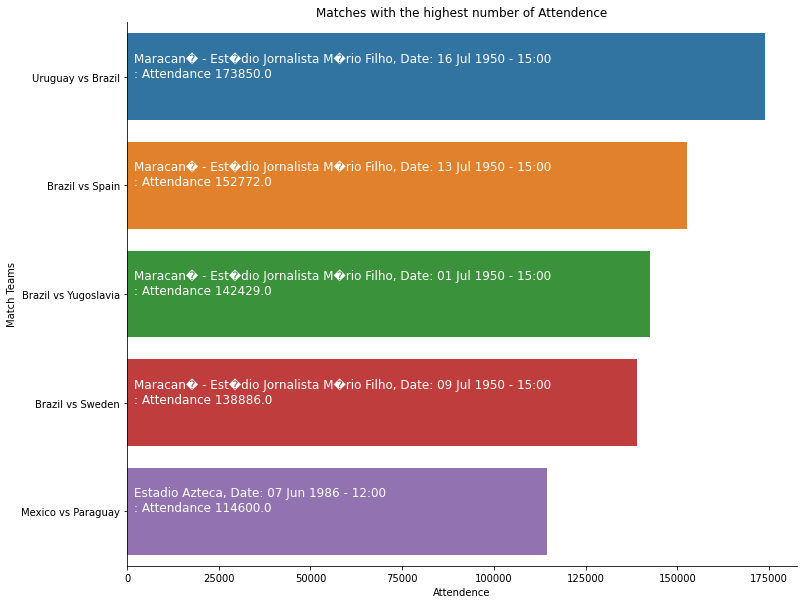

In [47]:
top5_attendance = matches.sort_values(by='Attendance',ascending=False)[:5]
top5_attendance

top5_attendance['vs'] = top5_attendance['Home Team Name'] + " vs " + top5_attendance['Away Team Name']

top5_attendance['attend']= top5_attendance['Attendance'].astype(str)

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top5_attendance['vs'], x = top5_attendance['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate(top5_attendance['Stadium'] +", Date: " + top5_attendance['Datetime']+"\n"+": Attendance " + top5_attendance['attend']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

## The Highest-Scoring matches in the World Cup

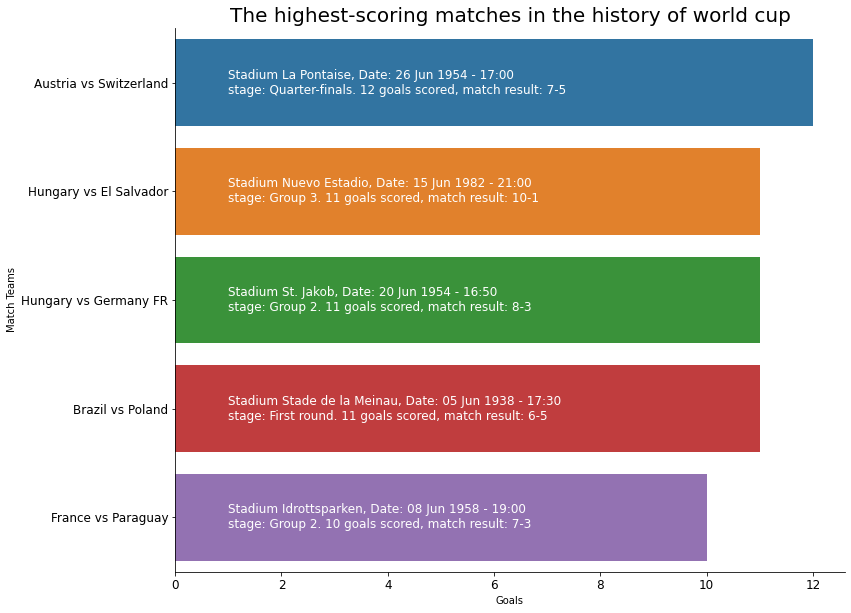

In [48]:
matches['total_goals'] = matches['Home Team Goals']+ matches['Away Team Goals']
matches['vs'] = matches['Home Team Name'] + " vs "+ matches['Away Team Name']

top5_goals=matches.sort_values(by='total_goals',ascending=False)[:5]

top5_goals['vs'] = top5_goals['Home Team Name'] + " vs " + top5_goals['Away Team Name']

top5_goals['total_goals_str']= top5_goals['total_goals'].astype(str)+ " goals scored"


top5_goals['Home Team Goals'] = top5_goals['Home Team Goals'].astype(int)
top5_goals['Away Team Goals'] = top5_goals['Away Team Goals'].astype(int)


top5_goals['result'] = top5_goals['Home Team Goals'].astype(str)+"-"+top5_goals['Away Team Goals'].astype(str)


plt.figure(figsize = (12,10))
ax = sns.barplot(y = top5_goals['vs'], x = top5_goals['total_goals'])
sns.despine(right = True)
plt.ylabel('Match Teams')
plt.xlabel('Goals')
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('The highest-scoring matches in the history of world cup',size=20)
 

for i, s in enumerate("Stadium "+top5_goals['Stadium'] +", Date: " + top5_goals['Datetime']+"\n" +"stage: "+top5_goals['Stage']+". "+
                      top5_goals['total_goals_str']+ ", match result: "+top5_goals['result'] ):
    ax.text(1, i ,s,fontsize = 12, color = 'white',va = 'center')



plt.show()

## Highest difference of goals in a World Cup

In [49]:
matches['difference_goals'] = pd.Series.abs(matches['Home Team Goals'] - matches['Away Team Goals']) #calculate the absolute difference with abs
top5_difference=matches.sort_values(by='difference_goals',ascending=False)[:5]
top5_difference

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,result,total_goals,vs,difference_goals
80,1954.0,17 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Hungary,9,0,Korea Republic,,...,VON GUNTER Albert (SUI),STEINER Carl (AUT),211.0,1294.0,HUN,KOR,9-0,9,Hungary vs Korea Republic,9
243,1974.0,18 Jun 1974 - 19:30,Group 2,Parkstadion,Gelsenkirchen,Yugoslavia,9,0,Zaire,,...,LLOBREGAT Vicente (VEN),BARRETO RUIZ Ramon (URU),262.0,2186.0,YUG,ZAI,9-0,9,Yugoslavia vs Zaire,9
312,1982.0,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10,1,El Salvador,,...,CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293.0,896.0,HUN,SLV,10-1,11,Hungary vs El Salvador,9
66,1950.0,02 Jul 1950 - 15:00,Group 4,Independencia,Belo Horizonte,Uruguay,8,0,Bolivia,,...,VIANA Mario (BRA),LEMESIC Leo (YUG),208.0,1185.0,URU,BOL,8-0,8,Uruguay vs Bolivia,8
46,1938.0,12 Jun 1938 - 17:00,Quarter-finals,Fort Carree,Antibes,Sweden,8,0,Cuba,,...,WEINGARTNER Karl (AUT),SDEZ Victor (FRA),429.0,1158.0,SWE,CUB,8-0,8,Sweden vs Cuba,8


In [50]:
top5_difference['result']

80      9-0
243     9-0
312    10-1
66      8-0
46      8-0
Name: result, dtype: object

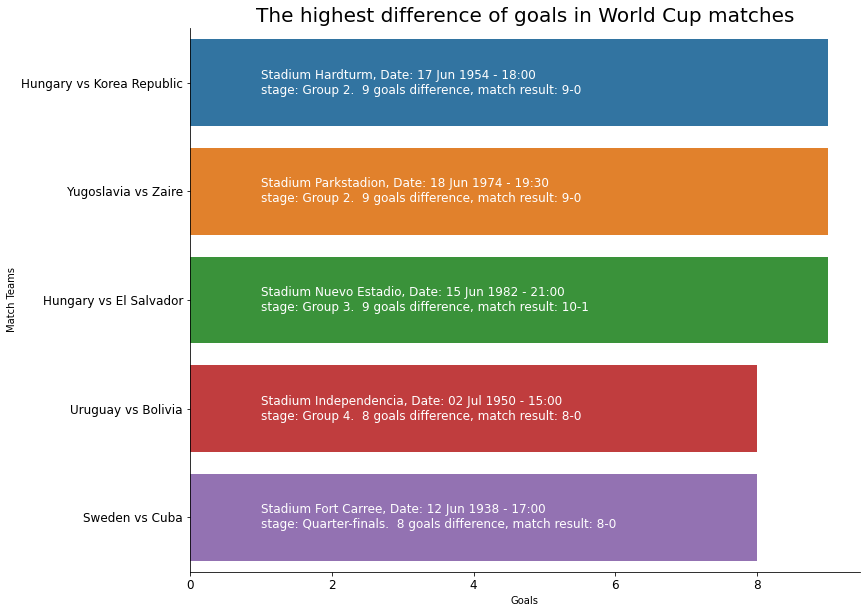

In [51]:
top5_difference['difference_goals']=top5_difference['difference_goals'].astype(int)


top5_difference['difference_goals_str']= top5_difference['difference_goals'].astype(str)+ " goals difference"




top5_difference['result'] = top5_difference['Home Team Goals'].astype(str)+"-"+top5_difference['Away Team Goals'].astype(str)


plt.figure(figsize = (12,10))
ax = sns.barplot(y = top5_difference['vs'], x = top5_difference['difference_goals'])
sns.despine(right = True)
plt.ylabel('Match Teams')
plt.xlabel('Goals')
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('The highest difference of goals in World Cup matches',size=20)
 

for i, s in enumerate("Stadium "+top5_difference['Stadium'] +", Date: " + top5_difference['Datetime']+"\n" +"stage: "+top5_difference['Stage']+".  "+
                      top5_difference['difference_goals_str']+ ", match result: "+top5_difference['result'] ):
    ax.text(1, i ,s,fontsize = 12, color = 'white',va = 'center')



plt.show()

## Highest Scoring countries

In [52]:
matches = matches.replace(['Germany FR'],'Germany') #The same as the first DF

In [53]:
list_countries =matches['Home Team Name'].unique().tolist()

In [54]:
lista_home=[]
lista_away=[]
for i in list_countries:

    goals_home = matches.loc[matches['Home Team Name'] == i, 'Home Team Goals'].sum()
    lista_home.append(goals_home)
    goals_away = matches.loc[matches['Away Team Name']== i, 'Away Team Goals'].sum()
    lista_away.append(goals_away)

In [55]:
df = pd.DataFrame({'country': list_countries,'total_home_goals':lista_home,'total_away_goals':lista_away})
df['total_goals'] =df['total_home_goals']+df['total_away_goals']
most_goals=df.sort_values(by='total_goals',ascending=False)[:10]
most_goals

,country,total_home_goals,total_away_goals,total_goals
13,Germany,168,67,235
7,Brazil,180,45,225
4,Argentina,111,22,133
15,Italy,99,29,128
0,France,68,40,108
14,Spain,50,42,92
34,Netherlands,51,40,91
10,Hungary,73,14,87
6,Uruguay,62,18,80
18,England,54,25,79


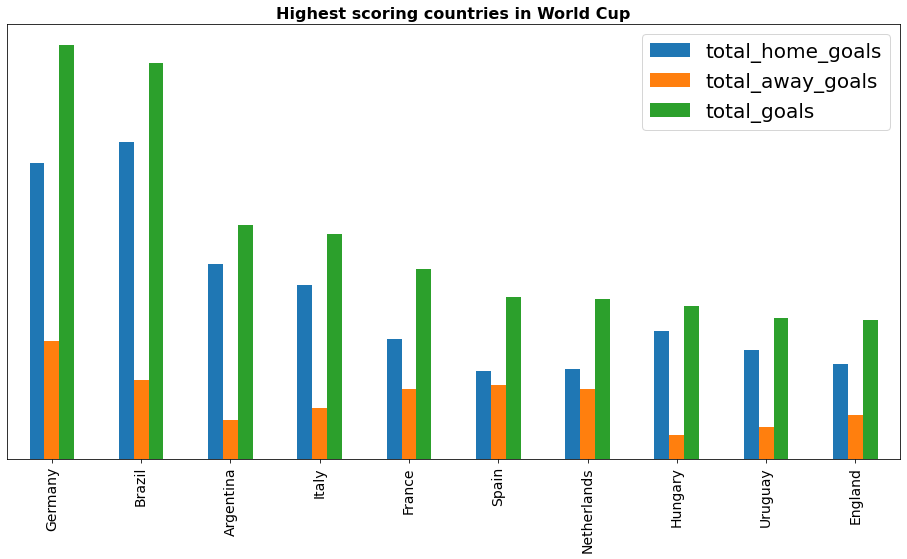

In [56]:
fig, ax= plt.subplots(figsize=(16,8))

plt.title('Highest scoring countries in World Cup',size=16,weight='bold')
most_goals.plot(x="country", y=["total_home_goals", "total_away_goals", "total_goals"], kind="bar",ax=ax)

#ax.spines[['right', 'top', 'left']].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(labelleft=False, left=False,labelsize=14)
ax.legend(fontsize=20)


fig.show();

## Total Goal Conceded of finalist teams

In [57]:
matches['Home Team Name'].value_counts()

Brazil                        82
Germany                       77
Italy                         57
Argentina                     54
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 77, dtype: int64

In [58]:
finalist

,index,Winner,Second,Third,Fourth,Total,Final,rel_final
0,Argentina,2.0,3.0,0.0,0.0,5.0,5.0,0.400000
3,Brazil,5.0,2.0,2.0,2.0,11.0,7.0,0.714286
6,Croatia,0.0,1.0,1.0,0.0,2.0,1.0,0.000000
7,Czechoslovakia,0.0,2.0,0.0,0.0,2.0,2.0,0.000000
8,England,1.0,0.0,0.0,2.0,3.0,1.0,1.000000
9,France,2.0,1.0,2.0,1.0,6.0,3.0,0.666667
10,Germany,4.0,4.0,4.0,1.0,13.0,8.0,0.500000
11,Hungary,0.0,2.0,0.0,0.0,2.0,2.0,0.000000
12,Italy,4.0,2.0,1.0,1.0,8.0,6.0,0.666667
14,Netherlands,0.0,3.0,1.0,1.0,5.0,3.0,0.000000


In [59]:
#Looking just the countries that have reached finals, that seem to be countries that have played more times worldcups
finalista =finalist['index'].tolist()

goalsconceded_home=[]
goalsconceded_away=[]
match1=[]
match2=[]
for i in finalista:

    goalsconc_home = matches.loc[matches['Home Team Name'] == i, 'Away Team Goals'].sum()
    goalsconceded_home.append(goalsconc_home)
    goalsconc_away = matches.loc[matches['Away Team Name']== i, 'Home Team Goals'].sum()
    goalsconceded_away.append(goalsconc_away)
    counted1 =(matches['Home Team Name']== i).sum() 
    counted2 =(matches['Away Team Name']== i).sum()
    
    match1.append(int(counted1))
    match2.append(int(counted2))

In [60]:
#team with fewest goals conceded

df = pd.DataFrame({'country': finalista,'goalsconceded_home':goalsconceded_home,'goalsconceded_away':goalsconceded_away,
                   'matches_home':match1,'matches_away':match2})
df['total_matches'] = df['matches_home']+ df['matches_away']
df['total_goalsconceded'] =df['goalsconceded_home']+df['goalsconceded_away']
df['goalmatch_rate'] = (df['total_goalsconceded'] / df['total_matches']).round(2)
goals_conceded=df.sort_values(by='goalmatch_rate')[:10]
goals_conceded

,country,goalsconceded_home,goalsconceded_away,matches_home,matches_away,total_matches,total_goalsconceded,goalmatch_rate
4,England,20,36,35,27,62,56,0.90
9,Netherlands,21,28,32,22,54,49,0.91
8,Italy,41,36,57,26,83,77,0.93
0,Argentina,44,41,54,27,81,85,1.05
1,Brazil,78,36,82,26,108,114,1.06
2,Croatia,6,11,3,13,16,17,1.06
6,Germany,68,55,77,33,110,123,1.12
10,Spain,30,36,30,29,59,66,1.12
5,France,31,41,31,30,61,72,1.18
12,Uruguay,29,44,28,24,52,73,1.40


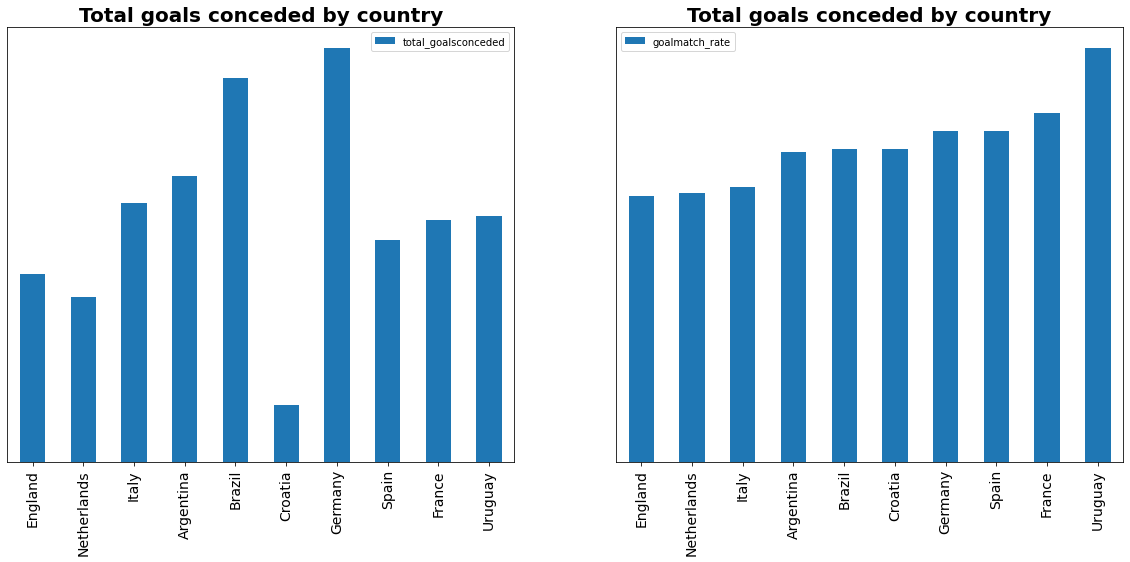

In [61]:
fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(20,8))

plt.title('Relationship between goals conceded and matches played in World Cup',size=16,weight='bold')
goals_conceded.plot(x="country", y="total_goalsconceded", kind="bar",ax=ax[0])

ax[0].set_title('Total goals conceded by country',size=20,weight='bold')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(labelleft=False, left=False,labelsize=14)


goals_conceded.plot(x="country", y="goalmatch_rate", kind="bar",ax=ax[1])

ax[1].set_title('Total goals conceded by country',size=20,weight='bold')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(labelleft=False, left=False,labelsize=14)